In [1]:
from __future__ import absolute_import
from __future__ import print_function
from collections import defaultdict
import os, sys
import xml.etree.ElementTree as et
import csv

import matplotlib
if 'matplotlib.backends' not in sys.modules:
    if 'TEXTTEST_SANDBOX' in os.environ or (os.name == 'posix' and 'DISPLAY' not in os.environ):
        matplotlib.use('Agg')
import matplotlib.pyplot as plt  # noqa
%matplotlib inline
import math  # noqa

In [2]:
# import sumolib
import os, sys
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:   
    sys.exit("please declare environment variable 'SUMO_HOME'")

from sumolib.xml import parse_fast_nested  # noqa
from sumolib.miscutils import uMin, uMax, parseTime  # noqa
from sumolib.options import ArgumentParser  # noqa

In [3]:
# reconstruct this part below
def fast_iter(context, func, args=[], kwargs={}):
    # http://www.ibm.com/developerworks/xml/library/x-hiperfparse/
    # Author: Liza Daly
    for event, elem in context:
        func(elem, *args, **kwargs)
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]
    del context

In [4]:
input_file_prefix_list = [
#     ["yi2lppoa", "2022-10-03-15-05-50"], 
#     ["6q2jgjtg", "2022-10-03-22-08-05"], 
#     ["m2h5qvf8", "2022-10-05-23-54-05"]
#     ["_ecgagh_", "2022-10-19-01-29-55"], 
#     ["p3ul46vy", "2022-10-20-01-01-02"], #IAoI
#     ["7xf1om3w", "2022-10-20-01-51-50"], #TAoI
#     ["pw2p7dg8", "2022-10-20-06-52-46"], #Base
#     ["sqeq6qrk", "2022-11-01-01-25-18"], # IAoI simple 1channel
#     ["4pfas5tn", "2022-11-01-03-37-29"], # IAoI simple 1channel
#     ["fiwtj5g7", "2022-11-03-06-27-06"], # IAoI simple 1channel 100sec
#     ["3d9mxyh3", "2022-11-03-08-06-25"], # IAoI simple 1channel 100sec
#     ["1bcov74b", "2022-11-03-10-11-06"] # TAoI simple 1channel 100sec
#     ["n_zlkn16", "2022-11-04-22-49-44"], # IAoI Lust 1channel 100sec
#     ["9m5lvtgh", "2022-11-05-22-26-57"], # TAoI Lust 1channel 100sec
#     ["ts_ihwan", "2022-11-07-04-57-40"], # Base Lust 1channel 100sec
#     ["g4742en5", "2022-11-09-06-40-04"]# IAoI simple 1channel 100sec emission
#     ["sztm_fuq", "2022-11-09-09-16-59"]# TAoI simple 1channel 100sec emission 
#     ["nfq560ag", "2022-11-10-07-01-50"]# TAoI simple 1channel 100sec emission 
#     ["eh9ibkm0", "2022-11-03-14-50-48"]# Base simple 1channel 100sec emission 
#     ["_gi9r0d8", "2022-12-18-06-06-45"]# IAoI Lust 1channel 
#     ["8t5y8pdx", "2023-01-03-12-03-50"]# Base Lust 5dur
    
#     ["ug7hhnfz", "2023-01-04-09-41-58"],# CAM Lust 
#     ["hjpbf27k", "2023-01-04-13-56-07"],# CAM bs Lust 
#     ["imrhevk2", "2023-01-04-18-52-33"],# airmcomp Lust 
#     ["mph2jt2i", "2023-01-05-08-10-56"],# aircomp sim 
#     ["am37tn_r", "2023-01-05-10-02-42"],# CAM bs sim
#     ["ikm56_93", "2023-01-05-11-04-25"],# CAM sim 
    
#     ["9e3k87sh", "2023-02-18-23-03-33"],# Aircomp LS 0.8
#     ["bf8_kio8", "2023-02-20-18-47-50"],# Aircomp LS 0.4
#     ["4yldpavk", "2023-02-20-22-26-59"],# Aircomp LS 0.2
#     ["4vp3_bw2", "2023-02-21-23-36-21"],# Aircomp LS 0.6
    ["obt34am1", "2023-02-23-21-46-14"],# Aircomp Lust 0.8
    ["8h6x6vwo", "2023-02-24-10-30-00"],# Aircomp Lust 0.4
    ["xojm649z", "2023-02-24-16-32-05"],# Aircomp Lust 0.2
    ["_z39yd0s", "2023-02-25-00-52-12"],# Aircomp Lust 0.6
]

In [5]:
ssm_file_list = []
carType = ["passenger1", "passenger2a", "passenger2b", "passenger3",  "passenger4",  "passenger5",  "bus"]
# carType = ["CarA", "CarB", "CarC", "CarD"]
for i in input_file_prefix_list:
    path = []
    for j in carType:
        x = "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_" + j + ".xml"
        path.append(x)
    ssm_file_list.append(path)
conflicts_list = []
globalMeasures_list = []

In [6]:
print(ssm_file_list)

[['./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger1.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger2a.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger2b.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger3.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger4.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger5.xml', './Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_bus.xml'], ['./Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger1.xml', './Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger2a.xml', './Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger2b.xml', './Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger3.xml', './Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger4.xml', './Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_pa

In [7]:
#     x = ["./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger1.xml",
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger2a.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger2b.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger3.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger4.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_passenger5.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_bus.xml"
#     ]
#     path = ["./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_CarA.xml",
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_CarB.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_CarC.xml", 
#          "./Aircomp/sumo-launchd-tmp-" + i[0] + "/" + i[1] + "_ssm_CarD.xml"
#     ]

In [8]:
# Get SSM collision and globalMeasures data
# fast_iter
for input_file in ssm_file_list:
    conflicts = []
    globalMeasures = []
    i = 0
    for inpu in input_file: 
        print("Current running: ", inpu)
        
        for event, elem in et.iterparse(inpu, events = ("end", )):
            if elem.tag == 'conflict':
                cs = {'begin': elem.get('begin'), 'end': elem.get('end'), 'ego': elem.get('ego'), 'foe': elem.get('foe'), 'carType': carType[i]}
                for child in elem:
                    if child.tag == 'minTTC':
                        cs['minTTC'] = child.get('value')
                        cs['minTTC_time'] = child.get('time')
                        cs['minTTC_type'] = child.get('type')
                    elif child.tag == 'maxDRAC':
                        cs['maxDRAC'] = child.get('value')
                        cs['maxDRAC_time'] = child.get('time')
                        cs['maxDRAC_type'] = child.get('type')
                if 'minTTC' not in cs:
                    cs['minTTC'] = "NA"
                    cs['minTTC_time'] = "NA"
                    cs['minTTC_type'] = "NA"
                if 'maxDRAC' not in cs:
                    cs['maxDRAC'] = "NA"
                    cs['maxDRAC_time'] = "NA"
                    cs['maxDRAC_type'] = "NA"
                conflicts.append(cs)
            if elem.tag == 'globalMeasures':
                gm = {'ego': elem.get('ego'), 'carType': carType[i]}
                for child in elem:
                    if child.tag == 'maxBR':
                        gm['maxBR'] = child.get('value')
                        gm['maxBR_time'] = child.get('time')
                    if child.tag == 'minSGAP':
                        gm['minSGAP'] = child.get('value')
                        gm['minSGAP_time'] = child.get('time')
                        gm['minSGAP_leader'] = child.get('leader')
                    if child.tag == 'minTGAP':
                        gm['minTGAP'] = child.get('value')
                        gm['minTGAP_time'] = child.get('time')
                        gm['minTGAP_leader'] = child.get('leader')
                if 'maxBR' not in gm: 
                    gm['maxBR'] = "NA"
                    gm['maxBR_time'] = "NA"
                if 'minSGAP' not in gm:  
                    gm['minSGAP'] = "NA"
                    gm['minSGAP_time'] = "NA"
                    gm['minSGAP_leader'] = "NA"
                if 'minTGAP' not in gm:  
                    gm['minTGAP'] = "NA"
                    gm['minTGAP_time'] = "NA"
                    gm['minTGAP_leader'] = "NA"
                globalMeasures.append(gm)
        i = i+1
    conflicts_list.append(conflicts)
    globalMeasures_list.append(globalMeasures)    
    print("    conflicts: ", len(conflicts), ", globalMeasures: ", len(globalMeasures), ".")
#         while elem.getprevious() is not None:
#             del elem.getparent()[0]

print("Total: ", len(conflicts_list), ", ", len(globalMeasures_list))

Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger1.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger2a.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger2b.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger3.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger4.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_passenger5.xml
Current running:  ./Aircomp/sumo-launchd-tmp-obt34am1/2023-02-23-21-46-14_ssm_bus.xml
    conflicts:  2053 , globalMeasures:  815 .
Current running:  ./Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger1.xml
Current running:  ./Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger2a.xml
Current running:  ./Aircomp/sumo-launchd-tmp-8h6x6vwo/2023-02-24-10-30-00_ssm_passenger2b.xml
Current running:  ./Aircomp

In [9]:
# output data to csv file
a = 0
for inpu in input_file_prefix_list:
    
    print("Write file: ","ssm-conflicts-" + inpu[0] + ".csv")
    csvfile = open("ssm-conflicts-" + inpu[0] + ".csv","w",newline='')
    data_csv = csv.writer(csvfile)
    data_csv.writerow([
        "begin", "end", "ego", "foe", "carType", 
        "minTTC", "minTTC_time", "minTTC_type", 
        "maxDRAC", "maxDRAC_time", "maxDRAC_type"
    ])
    for i in range(0,len(conflicts_list[a])):
        data_csv.writerow([
            conflicts_list[a][i]['begin'], conflicts_list[a][i]['end'], conflicts_list[a][i]['ego'], conflicts_list[a][i]['foe'], conflicts_list[a][i]['carType'], 
            conflicts_list[a][i]['minTTC'], conflicts_list[a][i]['minTTC_time'], conflicts_list[a][i]['minTTC_type'], 
            conflicts_list[a][i]['maxDRAC'], conflicts_list[a][i]['maxDRAC_time'], conflicts_list[a][i]['maxDRAC_type']
        ])
    print("    Write line: ", len(conflicts_list[a]))
    csvfile.close()
    print("Write file: ","ssm-globalMeasures-" + inpu[0] + ".csv")
    csvfile_2 = open("ssm-globalMeasures-" + inpu[0] + ".csv","w",newline='')
    data_csv_2 = csv.writer(csvfile_2)
    data_csv_2.writerow([
        "ego", "carType", 
        "maxBR", "maxBR_time", 
        "minSGAP", "minSGAP_time", "minSGAP_leader", 
        "minTGAP", "minTGAP_time", "minTGAP_leader"
    ])
    for i in range(0,len(globalMeasures_list[a])):
        data_csv_2.writerow([
            globalMeasures_list[a][i]['ego'], globalMeasures_list[a][i]['carType'], 
            globalMeasures_list[a][i]['maxBR'], globalMeasures_list[a][i]['maxBR_time'], 
            globalMeasures_list[a][i]['minSGAP'], globalMeasures_list[a][i]['minSGAP_time'], globalMeasures_list[a][i]['minSGAP_leader'],
            globalMeasures_list[a][i]['minTGAP'], globalMeasures_list[a][i]['minTGAP_time'], globalMeasures_list[a][i]['minTGAP_leader'] 
        ])
    print("    Write line: ", len(globalMeasures_list[a]))
    csvfile_2.close()
    a = a + 1

Write file:  ssm-conflicts-obt34am1.csv
    Write line:  2053
Write file:  ssm-globalMeasures-obt34am1.csv
    Write line:  815
Write file:  ssm-conflicts-8h6x6vwo.csv
    Write line:  2055
Write file:  ssm-globalMeasures-8h6x6vwo.csv
    Write line:  815
Write file:  ssm-conflicts-xojm649z.csv
    Write line:  2051
Write file:  ssm-globalMeasures-xojm649z.csv
    Write line:  815
Write file:  ssm-conflicts-_z39yd0s.csv
    Write line:  2053
Write file:  ssm-globalMeasures-_z39yd0s.csv
    Write line:  815


In [10]:
#  option
plot_ttype = []
plot_ttype.append('t')
plot_ttype.append('s')
print(plot_ttype)

['t', 's']


In [11]:
# init ttype KEY
KEYS = {
    't': 'Time',
    's': 'Speed',
    'd': 'Distance',
    'a': 'Acceleration',
    'i': 'Angle',
    'x': 'x-Position',
    'y': 'y-Position',
    'k': 'kilometrage',
    'g': 'gap',
}

In [12]:
def onpick(event):
    mevent = event.mouseevent
    print("veh=%s x=%d y=%d" % (event.label, mevent.xdata, mevent.ydata))

In [13]:
fig = plt.figure(figsize=(14, 9), dpi=100)
fig.canvas.mpl_connect('pick_event', onpick)

5

<Figure size 1400x900 with 0 Axes>

In [14]:
ave_ttc = 0
ave_drac = 0
for i in range(0,len(conflicts)):
    if conflicts[i]['minTTC'] == 'NA':
        ave_ttc += 0
    else: 
        ave_ttc += float(conflicts[i]['minTTC'])
    if conflicts[i]['maxDRAC'] == 'NA':
        ave_drac += 0
    else:
        ave_drac += float(conflicts[i]['maxDRAC'])
ave_ttc /= len(conflicts)
ave_drac /= len(conflicts)

In [15]:
print(ave_ttc, ", ", ave_drac)

1.6205884072089598 ,  48.3462956648806


In [16]:
# xdata = None
# ydata = None
# xdata = plot_ttype[0]
# ydata = plot_ttype[1]
# if (len(plot_ttype) == 2 and xdata in KEYS and ydata in KEYS):
#     xLabel = [KEYS[xdata]]
#     yLabel = KEYS[ydata]
#     plt.xlabel(xLabel)
#     plt.ylabel(yLabel)
#     plt.title('Title')
# else:
#     sys.exit("unsupported plot type '%s'" % plot_ttype)

In [17]:
element = 'vehicle'
location = 'lane'
# if options.persons:
#     element = 'person'
#     location = 'edge'

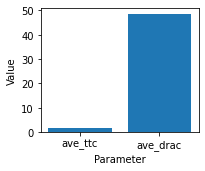

In [18]:
plt.figure(figsize=(13, 5))
plt.subplot(241)
plt.rcParams['savefig.dpi'] = 100 
plt.rcParams['figure.dpi'] = 100 
plt.rcParams.update({'font.size': 10})
width = 0.25
xLabel = ["minTTC", "maxDRAC"]

plt.bar(["ave_ttc", "ave_drac"], [ave_ttc, ave_drac])
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.show()
